<a href="https://www.kaggle.com/code/victor116/premier-league-analysis?scriptVersionId=125837086" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.animation as animation


In [2]:
# let's explore premier league events dataset

epl_events_df = pd.read_csv("/kaggle/input/european-football-season-202223/events_premier-league_2022-23.csv")

epl_events_df.shape
epl_events_df.head()

,event_id,match_id,team,event_team,event_time,event_type,action_player_1,action_player_2
0,1,1,Arsenal,away,8,Goal,Gabriel Martinelli,NaN
1,2,1,Arsenal,away,23,Yellow card,Ben White,NaN
2,3,1,Arsenal,away,28,Goal,Gabriel Jesus,Gabriel Martinelli
3,4,1,Liverpool,home,31,Yellow card,Virgil van Dijk,NaN
4,5,1,Liverpool,home,41,Yellow card,Trent Alexander-Arnold,NaN


In [3]:
epl_matches_df = pd.read_csv("/kaggle/input/european-football-season-202223/matches_premier-league_2022-23.csv", index_col=0)

epl_matches_df.shape

(296, 28)

In [4]:
events_matches_df = epl_events_df.merge(epl_matches_df, on="match_id", how="left", suffixes=("_evt", "_mth"))
events_matches_df.head()

,event_id,match_id,team,event_team,event_time,event_type,action_player_1,action_player_2,stage,date,...,prediction_draw,prediction_team_away_win,prediction_quantity,location,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away
0,1,1,Arsenal,away,8,Goal,Gabriel Martinelli,NaN,Matchday 30,09/04/2023,...,0.04,0.59,255814,Anfield,"[{'player_name': ' Diogo Jota ', 'player_numbe...","[{'player_name': ' Martinelli ', 'player_numbe...","['Diogo Jota', 'Gakpo', 'Salah', 'Jones', 'Fab...","['20', '18', '11', '17', '3', '14', '26', '4',...","['Martinelli', 'Jesus', 'Saka', 'Xhaka', 'Part...","['11', '9', '7', '34', '5', '8', '35', '6', '1..."
1,2,1,Arsenal,away,23,Yellow card,Ben White,NaN,Matchday 30,09/04/2023,...,0.04,0.59,255814,Anfield,"[{'player_name': ' Diogo Jota ', 'player_numbe...","[{'player_name': ' Martinelli ', 'player_numbe...","['Diogo Jota', 'Gakpo', 'Salah', 'Jones', 'Fab...","['20', '18', '11', '17', '3', '14', '26', '4',...","['Martinelli', 'Jesus', 'Saka', 'Xhaka', 'Part...","['11', '9', '7', '34', '5', '8', '35', '6', '1..."
2,3,1,Arsenal,away,28,Goal,Gabriel Jesus,Gabriel Martinelli,Matchday 30,09/04/2023,...,0.04,0.59,255814,Anfield,"[{'player_name': ' Diogo Jota ', 'player_numbe...","[{'player_name': ' Martinelli ', 'player_numbe...","['Diogo Jota', 'Gakpo', 'Salah', 'Jones', 'Fab...","['20', '18', '11', '17', '3', '14', '26', '4',...","['Martinelli', 'Jesus', 'Saka', 'Xhaka', 'Part...","['11', '9', '7', '34', '5', '8', '35', '6', '1..."
3,4,1,Liverpool,home,31,Yellow card,Virgil van Dijk,NaN,Matchday 30,09/04/2023,...,0.04,0.59,255814,Anfield,"[{'player_name': ' Diogo Jota ', 'player_numbe...","[{'player_name': ' Martinelli ', 'player_numbe...","['Diogo Jota', 'Gakpo', 'Salah', 'Jones', 'Fab...","['20', '18', '11', '17', '3', '14', '26', '4',...","['Martinelli', 'Jesus', 'Saka', 'Xhaka', 'Part...","['11', '9', '7', '34', '5', '8', '35', '6', '1..."
4,5,1,Liverpool,home,41,Yellow card,Trent Alexander-Arnold,NaN,Matchday 30,09/04/2023,...,0.04,0.59,255814,Anfield,"[{'player_name': ' Diogo Jota ', 'player_numbe...","[{'player_name': ' Martinelli ', 'player_numbe...","['Diogo Jota', 'Gakpo', 'Salah', 'Jones', 'Fab...","['20', '18', '11', '17', '3', '14', '26', '4',...","['Martinelli', 'Jesus', 'Saka', 'Xhaka', 'Part...","['11', '9', '7', '34', '5', '8', '35', '6', '1..."


In [5]:
# Let's clean our data

events_matches_df.describe(include='all')

,event_id,match_id,team,event_team,event_time,event_type,action_player_1,action_player_2,stage,date,...,prediction_draw,prediction_team_away_win,prediction_quantity,location,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away
count,4296.000000,4296.000000,4296,4296,4296.000000,4296,4296,2953,4296,4296,...,4296.000000,4296.000000,4.296000e+03,4296,4296,4296,4296,4296,4296,4296
unique,NaN,NaN,20,2,NaN,10,519,428,30,89,...,NaN,NaN,NaN,20,279,277,279,279,277,277
top,NaN,NaN,Chelsea,home,NaN,Substitution,Disallowed goal,Penalty,Matchday 9,18/02/2023,...,NaN,NaN,NaN,Tottenham Hotspur Stadium,"[{'player_name': ' Bamford ', 'player_number':...","[{'player_name': ' Martinelli ', 'player_numbe...","['Bamford', 'Sinisterra', 'Aaronson', 'Harriso...","['9', '23', '7', '11', '8', '28', '3', '21', '...","['Martinelli', 'Jesus', 'Saka', 'Xhaka', 'Part...","['11', '9', '7', '34', '5', '8', '35', '6', '1..."
freq,NaN,NaN,237,2164,NaN,2305,40,55,159,121,...,NaN,NaN,NaN,236,35,56,35,35,56,56
mean,2148.500000,147.831006,NaN,NaN,64.173417,NaN,NaN,NaN,NaN,NaN,...,0.053666,0.452065,7.847190e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1240.292707,85.990163,NaN,NaN,22.237002,NaN,NaN,NaN,NaN,NaN,...,0.023692,0.269827,1.153898e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,0.010000,0.040000,1.314800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1074.750000,73.000000,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,...,0.040000,0.210000,2.443200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2148.500000,147.500000,NaN,NaN,69.000000,NaN,NaN,NaN,NaN,NaN,...,0.050000,0.430000,5.115200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3222.250000,223.000000,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,NaN,...,0.070000,0.700000,1.054905e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
events_matches_df.duplicated().any()

False

In [7]:
# Let's clean the matches dataset

events_matches_df.describe(include="all")

,event_id,match_id,team,event_team,event_time,event_type,action_player_1,action_player_2,stage,date,...,prediction_draw,prediction_team_away_win,prediction_quantity,location,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away
count,4296.000000,4296.000000,4296,4296,4296.000000,4296,4296,2953,4296,4296,...,4296.000000,4296.000000,4.296000e+03,4296,4296,4296,4296,4296,4296,4296
unique,NaN,NaN,20,2,NaN,10,519,428,30,89,...,NaN,NaN,NaN,20,279,277,279,279,277,277
top,NaN,NaN,Chelsea,home,NaN,Substitution,Disallowed goal,Penalty,Matchday 9,18/02/2023,...,NaN,NaN,NaN,Tottenham Hotspur Stadium,"[{'player_name': ' Bamford ', 'player_number':...","[{'player_name': ' Martinelli ', 'player_numbe...","['Bamford', 'Sinisterra', 'Aaronson', 'Harriso...","['9', '23', '7', '11', '8', '28', '3', '21', '...","['Martinelli', 'Jesus', 'Saka', 'Xhaka', 'Part...","['11', '9', '7', '34', '5', '8', '35', '6', '1..."
freq,NaN,NaN,237,2164,NaN,2305,40,55,159,121,...,NaN,NaN,NaN,236,35,56,35,35,56,56
mean,2148.500000,147.831006,NaN,NaN,64.173417,NaN,NaN,NaN,NaN,NaN,...,0.053666,0.452065,7.847190e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1240.292707,85.990163,NaN,NaN,22.237002,NaN,NaN,NaN,NaN,NaN,...,0.023692,0.269827,1.153898e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,0.010000,0.040000,1.314800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1074.750000,73.000000,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,...,0.040000,0.210000,2.443200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2148.500000,147.500000,NaN,NaN,69.000000,NaN,NaN,NaN,NaN,NaN,...,0.050000,0.430000,5.115200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3222.250000,223.000000,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,NaN,...,0.070000,0.700000,1.054905e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Thankfully, it seems that our data is cleaned already. We can go ahead to start the analysis of our data. Let's start with some overall premier league stats.

In [8]:
# The Events Summary for all premier league matches

events_matches_df["event_type"].value_counts()

Substitution          2305
Yellow card           1093
Goal                   719
Penalty                 55
Disallowed goal         40
Own goal                36
Missed penalty          17
Red card                17
Second yellow card      11
Retracted red card       3
Name: event_type, dtype: int64

In [9]:
events_matches_df.columns

Index(['event_id', 'match_id', 'team', 'event_team', 'event_time',
       'event_type', 'action_player_1', 'action_player_2', 'stage', 'date',
       'pens', 'pens_home_score', 'pens_away_score', 'team_name_home',
       'team_name_away', 'team_home_score', 'team_away_score',
       'possession_home', 'possession_away', 'total_shots_home',
       'total_shots_away', 'shots_on_target_home', 'shots_on_target_away',
       'duels_won_home', 'duels_won_away', 'prediction_team_home_win',
       'prediction_draw', 'prediction_team_away_win', 'prediction_quantity',
       'location', 'lineup_home', 'lineup_away', 'player_names_home',
       'player_numbers_home', 'player_names_away', 'player_numbers_away'],
      dtype='object')

In [10]:
# Let's get some columns that we need for some analysis

epl_matches_select = events_matches_df[['match_id', 'team', 'event_team', 
     'stage', 'date', 'team_name_home', 'team_name_away',
       'team_home_score', 'team_away_score', 'possession_home',
       'possession_away', 'total_shots_home', 'total_shots_away',
       'shots_on_target_home', 'shots_on_target_away', 'duels_won_home',
       'duels_won_away', 'prediction_team_home_win', 'prediction_draw',
       'prediction_team_away_win']]

epl_matches_select.head()

,match_id,team,event_team,stage,date,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away,prediction_team_home_win,prediction_draw,prediction_team_away_win
0,1,Arsenal,away,Matchday 30,09/04/2023,Liverpool,Arsenal,2,2,0.59,0.41,21,9,6,5,0.45,0.55,0.37,0.04,0.59
1,1,Arsenal,away,Matchday 30,09/04/2023,Liverpool,Arsenal,2,2,0.59,0.41,21,9,6,5,0.45,0.55,0.37,0.04,0.59
2,1,Arsenal,away,Matchday 30,09/04/2023,Liverpool,Arsenal,2,2,0.59,0.41,21,9,6,5,0.45,0.55,0.37,0.04,0.59
3,1,Liverpool,home,Matchday 30,09/04/2023,Liverpool,Arsenal,2,2,0.59,0.41,21,9,6,5,0.45,0.55,0.37,0.04,0.59
4,1,Liverpool,home,Matchday 30,09/04/2023,Liverpool,Arsenal,2,2,0.59,0.41,21,9,6,5,0.45,0.55,0.37,0.04,0.59


In [11]:
# to work with the just the matches data and not events,
# We drop duplicates to get single match data for all teams

team_stats_unique = epl_matches_select.drop_duplicates()

#rename some columns
team_stats_unique.rename( columns = {"team_home_score": "Home Team Goals", "team_away_score": "Away Team Goals"}, inplace=True)

# We'll use this funtion to group team statistics
# supplied as an argument for home and away games

def group_team_data(val, valx, aggfunc):
    team_stats = team_stats_unique.groupby(["team","event_team"])[[val, valx]].agg(aggfunc)
    team_stats.reset_index(inplace=True)
    team_stats.set_index("team", inplace=True)
    
    # rename column names to from tuples to the original value
    team_stats.columns = ["event_team",val,valx]
    return team_stats

# Get Goals Stats

team_goals = group_team_data("Home Team Goals","Away Team Goals", [np.sum])
team_goals.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,event_team,Home Team Goals,Away Team Goals
team,,,
AFC Bournemouth,away,38,13
AFC Bournemouth,home,15,19
Arsenal,away,11,30
Arsenal,home,42,18
Aston Villa,away,21,16


### Home and Away Goals this season
##### Let's look at the goals scored and conceded by all teams in home and away games in the premier league this season

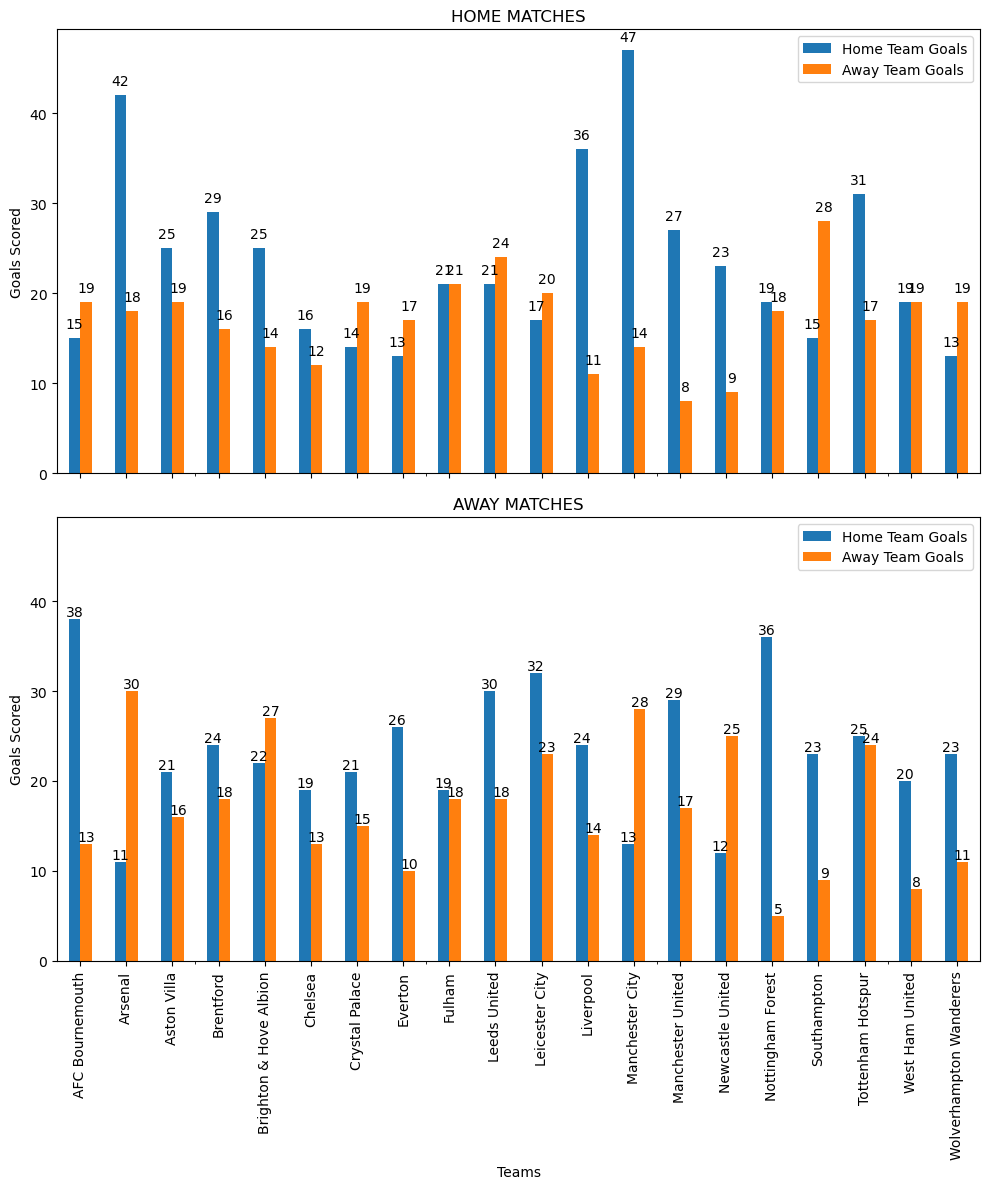

In [12]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, sharey=True, figsize=(10,12))

home_goals = team_goals[team_goals["event_team"] == "home"][["Home Team Goals","Away Team Goals"]]
away_goals = team_goals[team_goals["event_team"] == "away"][["Home Team Goals","Away Team Goals"]]


p1 = home_goals.plot.bar(ax=ax1)
ax1.set_title("HOME MATCHES")
ax1.set_ylabel("Goals Scored")

away_goals.plot.bar(ax=ax2)
ax2.set_title("AWAY MATCHES")
ax2.set_ylabel("Goals Scored")

for container in ax1.containers:
    ax1.bar_label(container, padding=5)

for container in ax2.containers:
    ax2.bar_label(container)
    
plt.xlabel('Teams')

plt.tight_layout()

In [13]:
# Save the chart

fig.savefig("epl_goals.png")

### Possession Stats
#### Let's analyze the average posession stats for premier league teams this season in home and away games

In [14]:
team_possession = group_team_data("possession_home","possession_away", [np.mean])

team_possession[["possession_home", "possession_away"]] = team_possession[["possession_home", "possession_away"]].apply(lambda x: round(x * 100))

team_possession.head()

,event_team,possession_home,possession_away
team,,,
AFC Bournemouth,away,63.0,37.0
AFC Bournemouth,home,39.0,61.0
Arsenal,away,44.0,56.0
Arsenal,home,65.0,35.0
Aston Villa,away,51.0,49.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == "__main__":


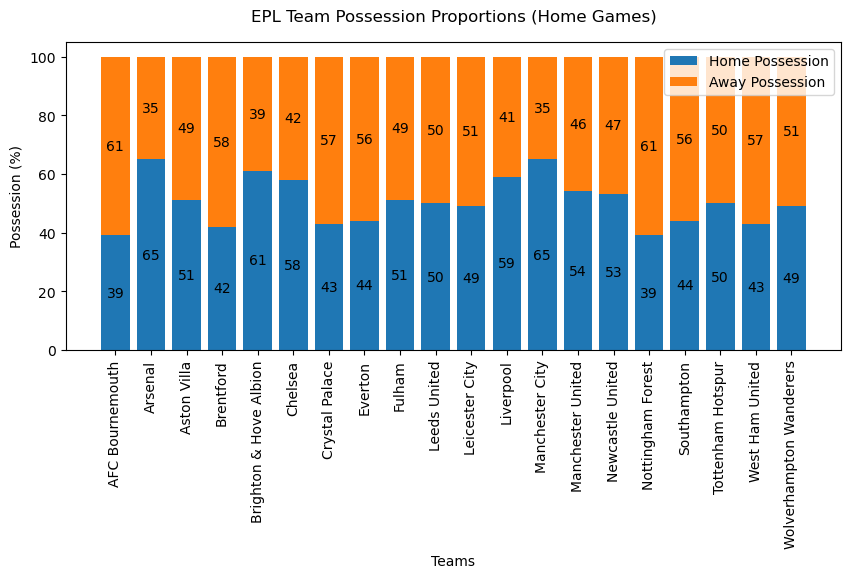

In [15]:
# Team Possessions, Home Games

home_possession = team_possession[team_possession["event_team"] == "home"][["possession_home","possession_away"]]

fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(home_possession.index, home_possession["possession_home"], label="Home Possession")
ax.bar(home_possession.index, home_possession["possession_away"], bottom=home_possession["possession_home"], label="Away Possession")
ax.set_xticklabels(home_possession.index, rotation=90)

ax.set_xlabel("Teams")
ax.set_ylabel("Possession (%)")
ax.set_title("EPL Team Possession Proportions (Home Games)", pad=15)

for container in ax.containers:
    ax.bar_label(container, label_type="center")

plt.legend()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == "__main__":


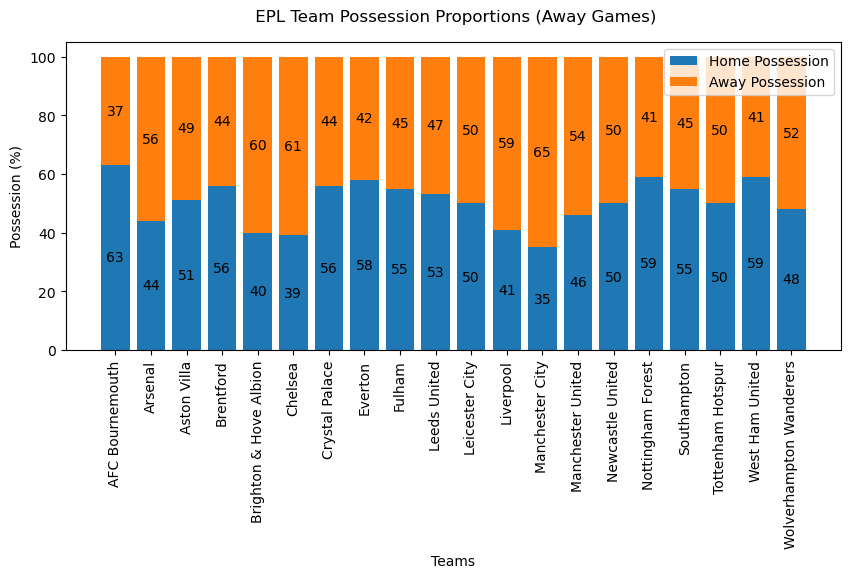

In [16]:
# Team Possessions, Home Games

away_possession = team_possession[team_possession["event_team"] == "away"][["possession_home","possession_away"]]

fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(away_possession.index, away_possession["possession_home"], label="Home Possession")
ax.bar(away_possession.index, away_possession["possession_away"], bottom=away_possession["possession_home"], label="Away Possession")
ax.set_xticklabels(away_possession.index, rotation=90)

ax.set_xlabel("Teams")
ax.set_ylabel("Possession (%)")
ax.set_title(" EPL Team Possession Proportions (Away Games)", pad=15)

for container in ax.containers:
    ax.bar_label(container, label_type="center")
plt.legend()

### Duels Won
##### Let's investigate average duels won in the premier league this season. With this, we can see teams that perform less than others in terms of duels

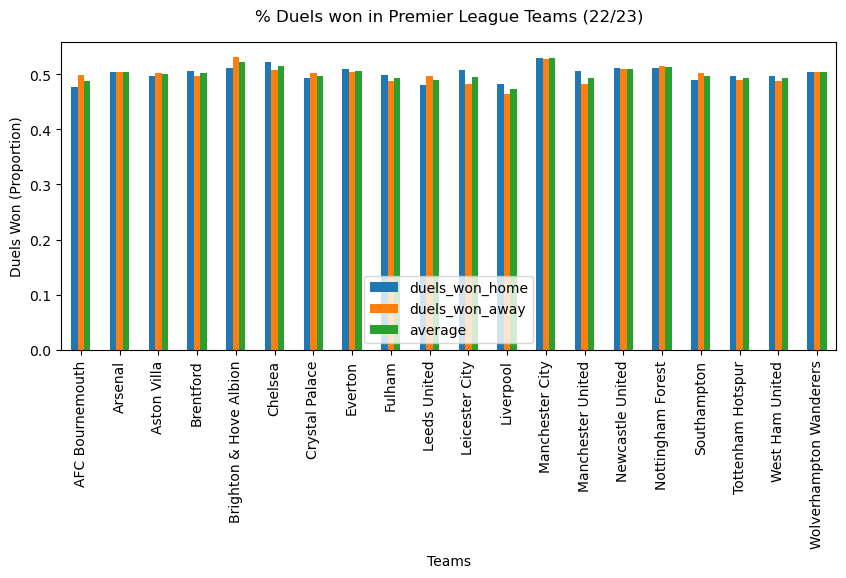

<Figure size 640x480 with 0 Axes>

In [17]:
# Let's check for duels won in home and away games for premier league teams
fig, ax = plt.subplots(figsize=(10,4))

duels_won = group_team_data("duels_won_home","duels_won_away", [np.mean])

home_duels = duels_won.query("event_team == 'home'")[["duels_won_home"]]
away_duels = duels_won.query("event_team == 'away'")[["duels_won_away"]]

home_away_duels = home_duels.merge(away_duels, left_index=True, right_index=True)

home_away_duels["average"] = (home_away_duels["duels_won_home"] + home_away_duels["duels_won_away"])/2

home_away_duels.plot.bar(ax=ax)
ax.set_title("% Duels won in Premier League Teams (22/23)", pad=15)
ax.set_ylabel("Duels Won (Proportion)")
ax.set_xlabel("Teams")

plt.legend()
plt.show()

plt.tight_layout()

In [18]:
fig.savefig("duels_won.png")

In [19]:
# Top five home duels won

home_away_duels.sort_values(by="duels_won_home", ascending=False)[:5]

,duels_won_home,duels_won_away,average
team,,,
Manchester City,0.530000,0.527333,0.528667
Chelsea,0.522667,0.507333,0.515000
Brighton & Hove Albion,0.512143,0.532143,0.522143
Newcastle United,0.510714,0.510000,0.510357
Nottingham Forest,0.510667,0.514667,0.512667


In [20]:
# Top five away duels won

home_away_duels.sort_values(by="duels_won_away", ascending=False)[:5]

,duels_won_home,duels_won_away,average
team,,,
Brighton & Hove Albion,0.512143,0.532143,0.522143
Manchester City,0.530000,0.527333,0.528667
Nottingham Forest,0.510667,0.514667,0.512667
Newcastle United,0.510714,0.510000,0.510357
Chelsea,0.522667,0.507333,0.515000


In [21]:
# Top five avergae duels won (home and away)

home_away_duels.sort_values(by="average", ascending=False)[:5]

,duels_won_home,duels_won_away,average
team,,,
Manchester City,0.530000,0.527333,0.528667
Brighton & Hove Albion,0.512143,0.532143,0.522143
Chelsea,0.522667,0.507333,0.515000
Nottingham Forest,0.510667,0.514667,0.512667
Newcastle United,0.510714,0.510000,0.510357


### Matchday Goals
#### Let's get the trend of matchday goals over the course of the season

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Matchday Goals English Premier League (22/23)')

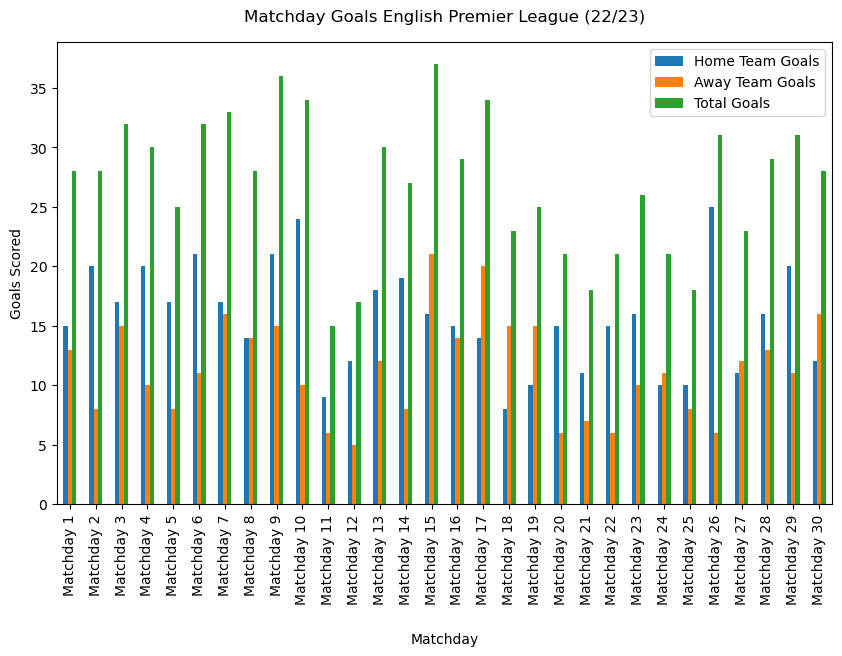

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))

# add new column to get integer values for matchdays
team_stats_unique["stage_int"] = team_stats_unique["stage"].apply(lambda x: int(x.split(" ")[1]))


matchday_goals = team_stats_unique.groupby(["stage_int"])[["Home Team Goals", "Away Team Goals"]].sum()
matchday_goals[["Home Team Goals","Away Team Goals"]] = matchday_goals[["Home Team Goals","Away Team Goals"]].apply(lambda x: x/2)
matchday_goals["Total Goals"] = sum([matchday_goals["Home Team Goals"], matchday_goals["Away Team Goals"]])

matchday_goals.sort_index(inplace = True)
matchday_goals.plot.bar(rot=90, ax=ax)
ax.set_xticklabels(["Matchday " + str(i) for i in matchday_goals.index])
ax.set_xlabel("Matchday")
ax.set_ylabel("Goals Scored")

ax.xaxis.labelpad = 20
ax.set_title("Matchday Goals English Premier League (22/23)", pad=15)

### Goals Distribution
##### Let's get insights into goal distribution over the course of 90 minutes this season. This will allow us know the if there are time periods when there are most goal actions in matches this season.

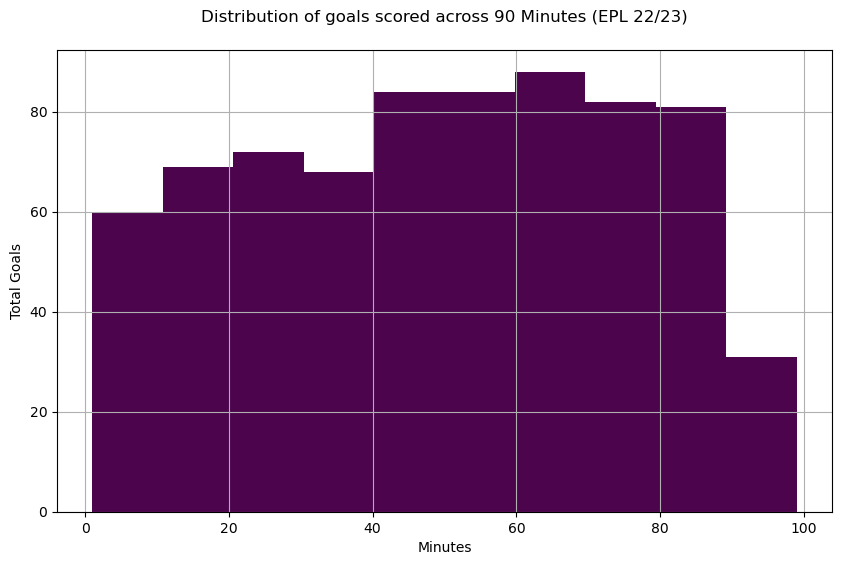

In [23]:
plt.style.use("default")

fig, ax = plt.subplots(figsize=(10, 6))

events_matches_df.head()

event_goals = events_matches_df.query("event_type == 'Goal'")[["event_id","event_type", "event_time"]]

event_goals.hist(ax=ax, column="event_time", color="#4c044d")
ax.set_xlabel("Minutes")
ax.set_ylabel("Total Goals")
ax.set_title("Distribution of goals scored across 90 Minutes (EPL 22/23)", pad=20)

plt.show()

fig.savefig("goalsdistribution.png")

### Goals Scored at Home
##### Goals score at home by premier league clubs this season

In [24]:
epl_matches_df.groupby("team_name_home")["team_home_score"].sum()

team_name_home
AFC Bournemouth            15
Arsenal                    42
Aston Villa                25
Brentford                  29
Brighton & Hove Albion     25
Chelsea                    16
Crystal Palace             14
Everton                    13
Fulham                     21
Leeds United               21
Leicester City             17
Liverpool                  36
Manchester City            47
Manchester United          27
Newcastle United           23
Nottingham Forest          19
Southampton                15
Tottenham Hotspur          31
West Ham United            19
Wolverhampton Wanderers    13
Name: team_home_score, dtype: int64

### Points Secured at Home
##### Total points secured at home by premier league clubs this season. 

In [25]:
teams = team_stats_unique.drop_duplicates(subset=["team"])['team']

home_points_dict = {}
for team in teams:
    home_points = 0
    home_games = epl_matches_df[epl_matches_df["team_name_home"].isin([team])]
    for i, row in home_games.iterrows():
        if row.team_home_score > row.team_away_score:
            home_points += 3
        elif row.team_home_score == row.team_away_score:
            home_points += 1
        else:
            home_points += 0
    home_points_dict[team] = home_points
    
home_points_df = pd.DataFrame.from_dict(home_points_dict, orient='index', columns=["Home Points"])

home_points_df.sort_values(by="Home Points", ascending=False)

,Home Points
Arsenal,38
Manchester City,37
Manchester United,36
Tottenham Hotspur,33
Liverpool,31
Newcastle United,29
Brentford,27
Aston Villa,26
Brighton & Hove Albion,24
Chelsea,23


### Points Secured Away
##### Total points secured at away by premier league clubs this season.

In [26]:
away_points_dict = {}
for team in teams:
    away_points = 0
    home_games = epl_matches_df[epl_matches_df["team_name_away"].isin([team])]
    for i, row in home_games.iterrows():
        if row.team_away_score > row.team_home_score:
            away_points += 3
        elif row.team_away_score == row.team_home_score:
            away_points += 1
        else:
            away_points += 0
    away_points_dict[team] = away_points
    
away_points_df = pd.DataFrame.from_dict(away_points_dict, orient='index', columns=["Away Points"])

away_points_df.sort_values(by="Away Points", ascending=False)

,Away Points
Arsenal,35
Manchester City,30
Newcastle United,27
Brighton & Hove Albion,22
Aston Villa,21
Manchester United,20
Tottenham Hotspur,20
Fulham,17
Chelsea,16
Brentford,16
